In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# =========================================
# Script: Red neuronal para predecir "Baja general"
# =========================================

# --- Instalación de librerías (solo la 1ra vez en Colab) ---
!pip install tensorflow scikit-learn pandas joblib

# --- Importación de librerías ---
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib


In [ ]:
# =========================================
import pandas as pd
from sklearn.model_selection import train_test_split
# 1. CARGAR DATOS
# Cargar el archivo limpio (ajusta el nombre si es diferente)
df = pd.read_csv("/content/drive/MyDrive/Base_NA_Final.csv")

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["Baja General", "Estatus", "Alta General"], errors="ignore")
y = df["Baja General"]

# 🔹 Convertir variables categóricas en variables dummy (0/1)
X = pd.get_dummies(X, drop_first=True)

# Dividir en train y test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test :", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test :", y_test.shape)



Tamaño de X_train: (1141, 531)
Tamaño de X_test : (286, 531)
Tamaño de y_train: (1141,)
Tamaño de y_test : (286,)


In [ ]:
# =========================================
# 2. ESCALADO DE VARIABLES
# =========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
# =========================================
# 3. DEFINICIÓN DEL MODELO
# =========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),   # Regularización
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # salida binaria
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name="auc")])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,161 (141.25 KB)

 Trainable params: 36,161 (141.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# =========================================
# 4. ENTRENAMIENTO
# =========================================
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5270 - auc: 0.5030 - loss: 0.8703 - val_accuracy: 0.6608 - val_auc: 0.7230 - val_loss: 0.6177
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6587 - auc: 0.7123 - loss: 0.6387 - val_accuracy: 0.7203 - val_auc: 0.7939 - val_loss: 0.5509
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7569 - auc: 0.7987 - loss: 0.5405 - val_accuracy: 0.7413 - val_auc: 0.8182 - val_loss: 0.5172
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8123 - auc: 0.8831 - loss: 0.4340 - val_accuracy: 0.7517 - val_auc: 0.8337 - val_loss: 0.4992
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8361 - auc: 0.9100 - loss: 0.3950 - val_accuracy: 0.7762 - val_auc: 0.8442 - val_loss: 0.4895
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8373 - auc: 0.9219 - loss: 0.3571 - val_accuracy: 0.7832 - val_auc: 0.8559 - val_loss: 0.4886
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/

In [ ]:
# =========================================
# 5. EVALUACIÓN
# =========================================
y_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print("\n🔹 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("🔹 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("🔹 ROC AUC:", roc_auc_score(y_test, y_proba))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

🔹 Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.76      0.79      0.78       126
        True       0.83      0.80      0.82       160

    accuracy                           0.80       286
   macro avg       0.79      0.80      0.80       286
weighted avg       0.80      0.80      0.80       286

🔹 Matriz de confusión:
[[100  26]
 [ 32 128]]
🔹 ROC AUC: 0.8660962301587303



🔹 Historial de entrenamiento:


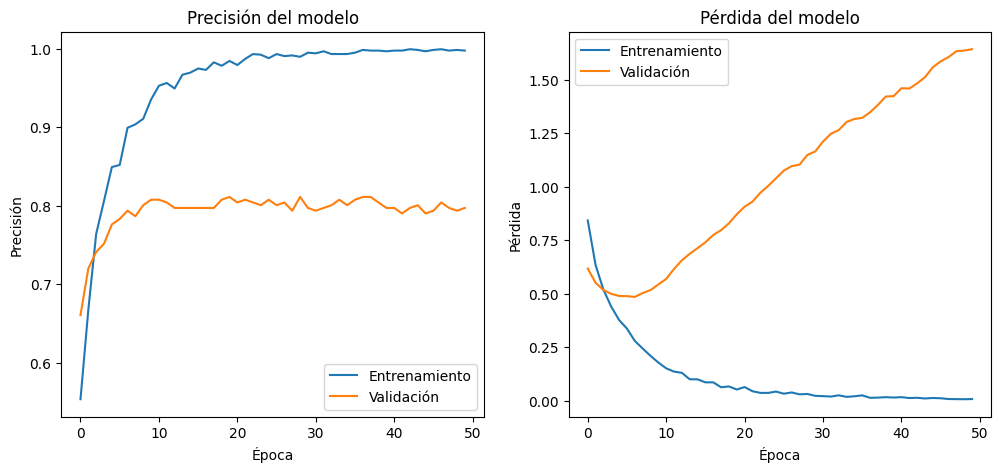


🔹 Curva ROC:


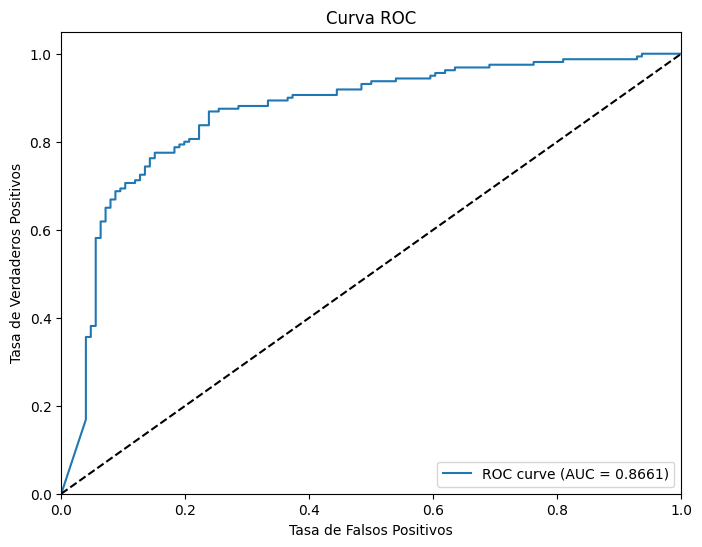


🔹 Matriz de confusión (Heatmap):


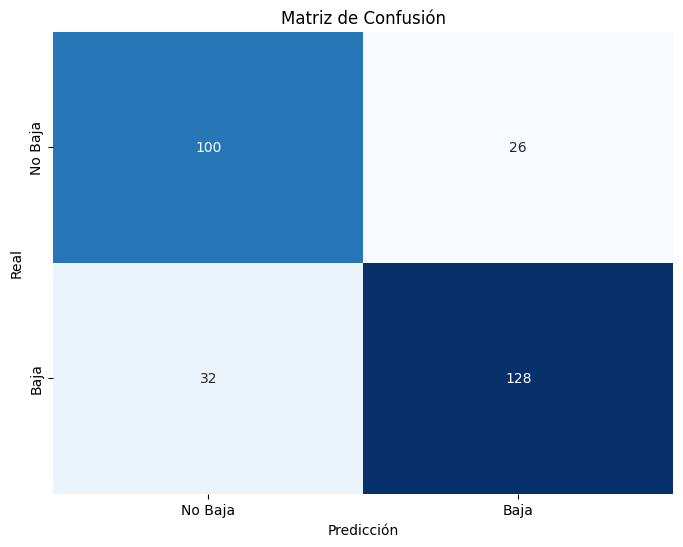

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Plotting training history
print("\n🔹 Historial de entrenamiento:")
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()

plt.show()

# Plotting ROC curve
print("\n🔹 Curva ROC:")
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Plotting Confusion Matrix
print("\n🔹 Matriz de confusión (Heatmap):")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Baja', 'Baja'], yticklabels=['No Baja', 'Baja'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Modelo XGBoost

Ahora vamos a implementar un modelo utilizando la librería `xgboost`.

In [ ]:
# --- Importación de librería específica para XGBoost ---
import xgboost as xgb

# =========================================
# 3. DEFINICIÓN DEL MODELO (XGBoost)
# =========================================
# Definir el modelo XGBoost
# Se utilizan algunos parámetros comunes, puedes ajustarlos según necesites
xgb_model = xgb.XGBClassifier(objective='binary:logistic',  # para clasificación binaria
                              n_estimators=1000,             # número de árboles
                              learning_rate=0.05,            # tasa de aprendizaje
                              max_depth=6,                  # profundidad máxima de los árboles
                              random_state=42,              # para reproducibilidad
                              use_label_encoder=False,      # para evitar warning
                              eval_metric='logloss')        # métrica de evaluación

print("Modelo XGBoost definido:")
print(xgb_model)

Modelo XGBoost definido:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)


In [ ]:
# =========================================
# 4. ENTRENAMIENTO (XGBoost)
# =========================================
# Entrenar el modelo XGBoost
# No es necesario escalar los datos para XGBoost, pero usamos los escalados
# ya que ya los tenemos preparados. También podríamos usar X_train y X_test sin escalar.
xgb_model.fit(X_train_scaled, y_train)

print("\nEntrenamiento del modelo XGBoost completado.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:58:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Entrenamiento del modelo XGBoost completado.


In [ ]:
# =========================================
# 5. EVALUACIÓN (XGBoost)
# =========================================
# Predecir probabilidades y clases con el modelo XGBoost
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_xgb = xgb_model.predict(X_test_scaled)

accuraxcy_xgb = xgb_model.score(X_test_scaled, y_test)
print("Precisión del modelo XGBoost:", accuraxcy_xgb)

print("\n🔹 Reporte de clasificación (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("🔹 Matriz de confusión (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("🔹 ROC AUC (XGBoost):", roc_auc_score(y_test, y_proba_xgb))

Precisión del modelo XGBoost: 0.8811188811188811

🔹 Reporte de clasificación (XGBoost):
              precision    recall  f1-score   support

       False       0.88      0.84      0.86       126
        True       0.88      0.91      0.90       160

    accuracy                           0.88       286
   macro avg       0.88      0.88      0.88       286
weighted avg       0.88      0.88      0.88       286

🔹 Matriz de confusión (XGBoost):
[[106  20]
 [ 14 146]]
🔹 ROC AUC (XGBoost): 0.9458829365079365


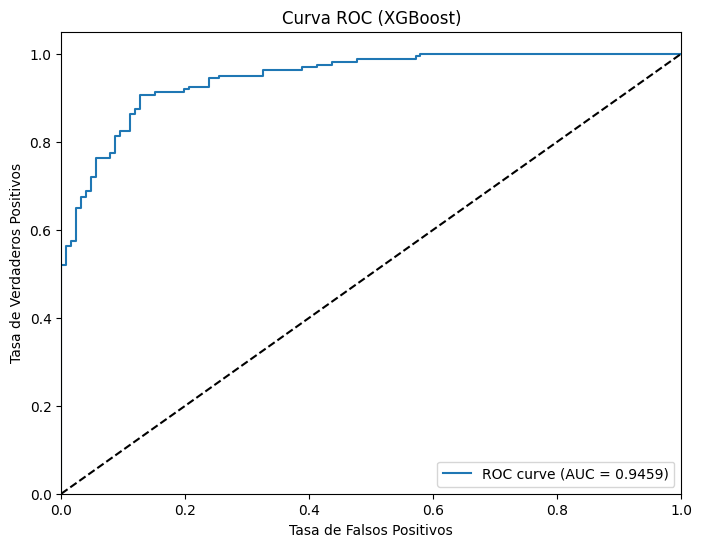

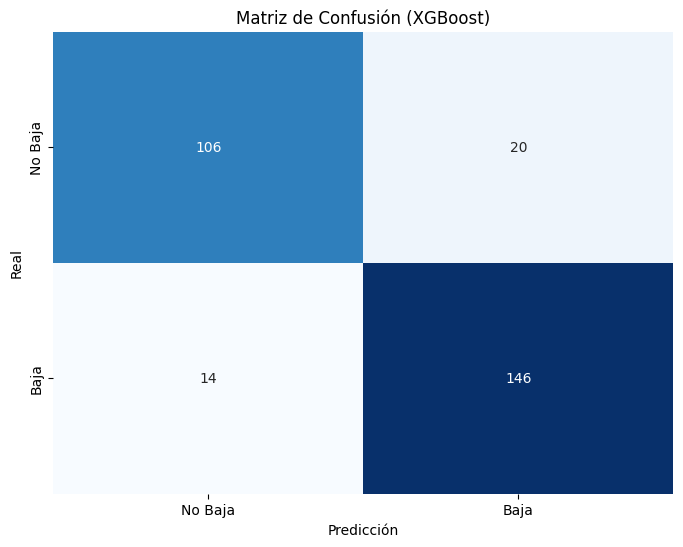

In [ ]:
# =========================================
# 6. VISUALIZACIÓN (XGBoost)
# =========================================
# Graficar la curva ROC para el modelo XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba_xgb):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (XGBoost)')
plt.legend(loc="lower right")
plt.show()

# Graficar la matriz de confusión como un heatmap para el modelo XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Baja', 'Baja'], yticklabels=['No Baja', 'Baja'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (XGBoost)')
plt.show()

# Modelo Random Forest

Ahora vamos a implementar un modelo utilizando la librería `random forest`.

In [ ]:
# --- Importación de librería específica para Random Forest ---
from sklearn.ensemble import RandomForestClassifier

# =========================================
# 3. DEFINICIÓN DEL MODELO (Random Forest)
# =========================================
# Definir el modelo Random Forest
# Se utilizan algunos parámetros comunes, puedes ajustarlos según necesites
rf_model = RandomForestClassifier(n_estimators=100,    # número de árboles en el bosque
                                 max_depth=10,         # profundidad máxima de los árboles
                                 random_state=42,      # para reproducibilidad
                                 class_weight='balanced') # para manejar desbalance de clases

print("Modelo Random Forest definido:")
print(rf_model)

Modelo Random Forest definido:
RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)


In [ ]:
# =========================================
# 4. ENTRENAMIENTO (Random Forest)
# =========================================
# Entrenar el modelo Random Forest
# No es necesario escalar los datos para Random Forest, pero usamos los escalados
# ya que ya los tenemos preparados. También podríamos usar X_train y X_test sin escalar.
rf_model.fit(X_train_scaled, y_train)

print("\nEntrenamiento del modelo Random Forest completado.")


Entrenamiento del modelo Random Forest completado.


In [ ]:
# =========================================
# 5. EVALUACIÓN (Random Forest)
# =========================================
# Predecir probabilidades y clases con el modelo Random Forest
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = rf_model.predict(X_test_scaled)

print("\n🔹 Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("🔹 Matriz de confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("🔹 ROC AUC (Random Forest):", roc_auc_score(y_test, y_proba_rf))


🔹 Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

       False       0.83      0.80      0.82       126
        True       0.85      0.88      0.86       160

    accuracy                           0.84       286
   macro avg       0.84      0.84      0.84       286
weighted avg       0.84      0.84      0.84       286

🔹 Matriz de confusión (Random Forest):
[[101  25]
 [ 20 140]]
🔹 ROC AUC (Random Forest): 0.9254464285714287


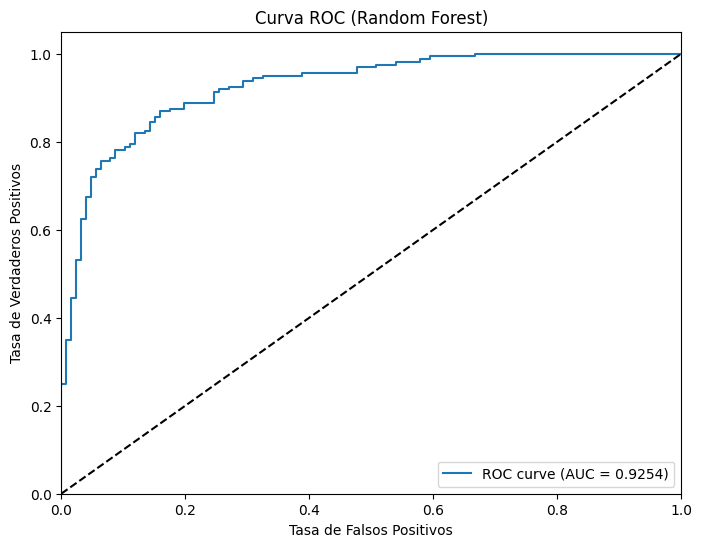

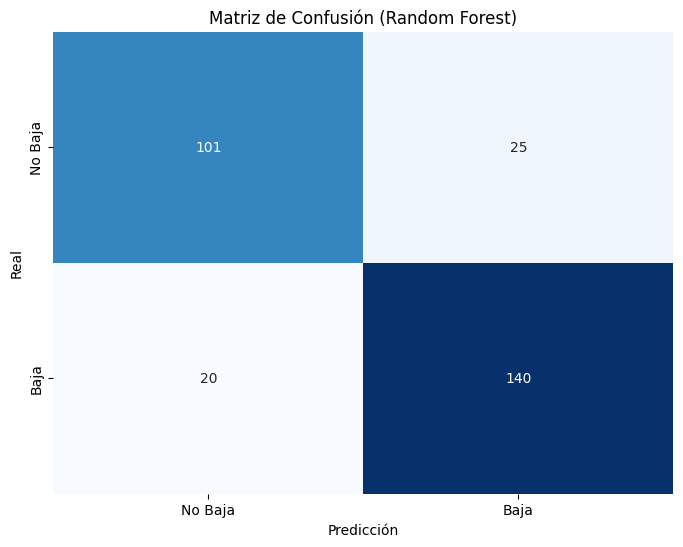

In [ ]:
# =========================================
# 6. VISUALIZACIÓN (Random Forest)
# =========================================
# Graficar la curva ROC para el modelo Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba_rf):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Graficar la matriz de confusión como un heatmap para el modelo Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Baja', 'Baja'], yticklabels=['No Baja', 'Baja'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Random Forest)')
plt.show()

# Modelo Bagging

Ahora vamos a implementar un modelo utilizando `BaggingClassifier` de `sklearn.ensemble`.

In [ ]:
# --- Importación de librería específica para Bagging ---
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier # Bagging a menudo usa Decision Trees como base

# =========================================
# 3. DEFINICIÓN DEL MODELO (Bagging)
# =========================================
# Definir el modelo Bagging
# Se utiliza un Decision Tree como estimador base, puedes ajustar los parámetros
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=base_estimator,
                                  n_estimators=100,       # número de estimadores base
                                  random_state=42,        # para reproducibilidad
                                  n_jobs=-1)              # usar todos los núcleos de CPU

print("Modelo Bagging definido:")
print(bagging_model)

Modelo Bagging definido:
BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)


In [ ]:
# =========================================
# 4. ENTRENAMIENTO (Bagging)
# =========================================
# Entrenar el modelo Bagging
# No es necesario escalar los datos para modelos basados en árboles, pero usamos los escalados
# ya que ya los tenemos preparados. También podríamos usar X_train y X_test sin escalar.
bagging_model.fit(X_train_scaled, y_train)

print("\nEntrenamiento del modelo Bagging completado.")


Entrenamiento del modelo Bagging completado.


In [ ]:
# =========================================
# 5. EVALUACIÓN (Bagging)
# =========================================
# Predecir probabilidades y clases con el modelo Bagging
y_proba_bagging = bagging_model.predict_proba(X_test_scaled)[:, 1]
y_pred_bagging = bagging_model.predict(X_test_scaled)

print("\n🔹 Reporte de clasificación (Bagging):")
print(classification_report(y_test, y_pred_bagging))

print("🔹 Matriz de confusión (Bagging):")
print(confusion_matrix(y_test, y_pred_bagging))

print("🔹 ROC AUC (Bagging):", roc_auc_score(y_test, y_proba_bagging))


🔹 Reporte de clasificación (Bagging):
              precision    recall  f1-score   support

       False       0.89      0.86      0.87       126
        True       0.89      0.92      0.90       160

    accuracy                           0.89       286
   macro avg       0.89      0.89      0.89       286
weighted avg       0.89      0.89      0.89       286

🔹 Matriz de confusión (Bagging):
[[108  18]
 [ 13 147]]
🔹 ROC AUC (Bagging): 0.9402777777777779


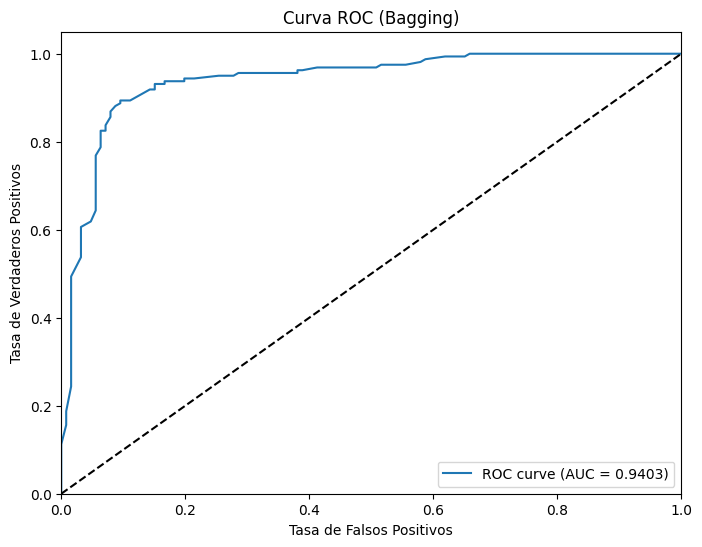

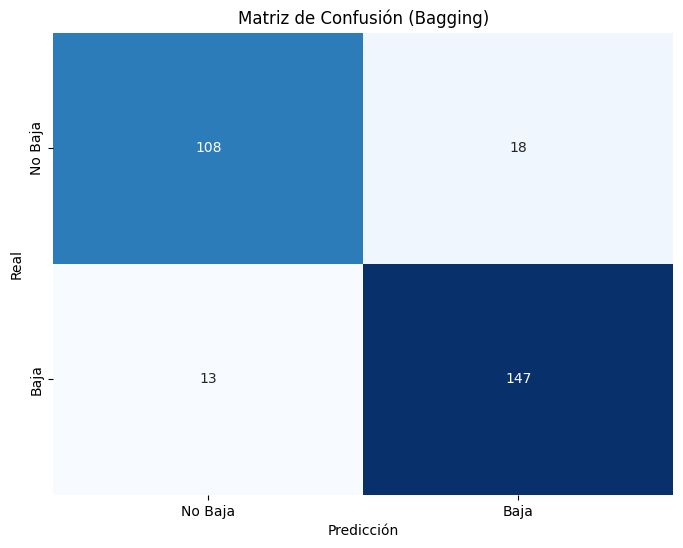

In [ ]:
# =========================================
# 6. VISUALIZACIÓN (Bagging)
# =========================================
# Graficar la curva ROC para el modelo Bagging
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_proba_bagging)
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba_bagging):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Bagging)')
plt.legend(loc="lower right")
plt.show()

# Graficar la matriz de confusión como un heatmap para el modelo Bagging
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Baja', 'Baja'], yticklabels=['No Baja', 'Baja'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Bagging)')
plt.show()